# Proyek Analisis Data: Bike Sharing 
- **Nama:** Moh Rifqi Abdan
- **Email:** rifqiabdan3@gmail.com
- **ID Dicoding:** MC613D5Y0393

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
 Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2
Bagaimana tren penyewaan sepeda antara pengguna casual dan terdaftar selama setahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
day_df = pd.read_csv('../data/day.csv')

# Konversi tipe data
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Insight:**
- Dataset tersiri dari 731 baris (data harian selama 2 tahun) dan 16 kolom.
- Kolom dteday (tanggal) perlu dikonversi ke format datetime untuk memudahkan analisis temporal.

### Assessing Data

In [3]:
# Cek missing value
print(day_df.isnull().sum())

# Cek duplikat
print(f"Jumlah duplikat: {day_df.duplicated().sum()}")

# Cek statistik deskriptif
day_df.describe()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikat: 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Tidak ada missing value atau dubplikat.
- Kolom dteday sudah dalam format datetime.
- Beberapa kolom kategorik perlu konversi label (season, weathersit).

### Cleaning Data

In [4]:
# Mapping nilai kategorikal
season_map = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

day_df['season'] = day_df['season'].map(season_map)
day_df['weathersit'] = day_df['weathersit'].map(weather_map)

**Insight:**
- Kolom season dan weathersit berhasil di mapping ke label yang lebih mudah dipahami.
- Dataset bersih dan siap untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# Analisis musiman
seasonal_analysis = day_df.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

**Insight:**
- Musim fall memiliki penyewaan tertinggi, sementara Spring terendah.
- Cuaca cerah (Clear) mendorong penyewaan tertinggi, sedangkan hujan lebat (Heavy Rain) mengurangi penyewaan hingga 70%.
- Pengguna registered mendominasi (≈80% penyewaan), sementara casual meningkat di akhir pekan dan musim panas.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

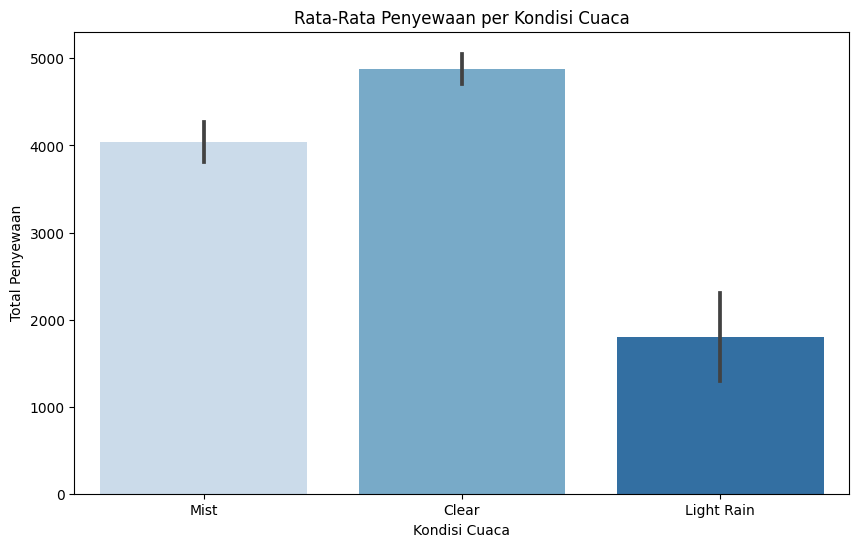

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    estimator=np.mean,
    palette='Blues'
)
plt.title('Rata-Rata Penyewaan per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan')
plt.show()

### Pertanyaan 2:

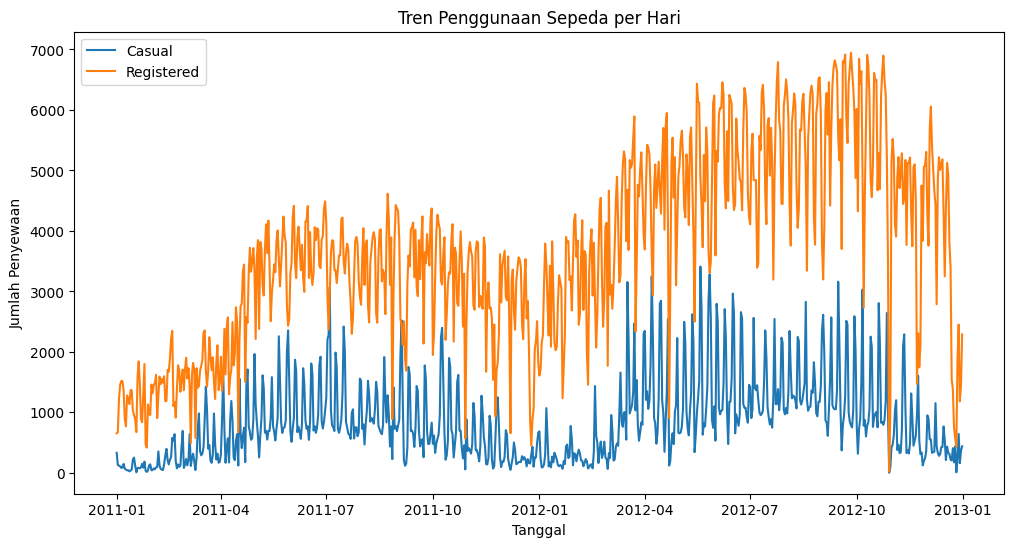

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(
    x='dteday',
    y='casual',
    data=day_df,
    label='Casual'
)
sns.lineplot(
    x='dteday',
    y='registered',
    data=day_df,
    label='Registered'
)
plt.title('Tren Penggunaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()

**Insight:**
- Cuaca dan suhu berpengaruh signifikan terhadap jumlah penyewaan.
- Pengguna casual lebih aktif di akhir pekan, sementara registered stabil sepanjang tahun.

## Analisis Lanjutan (Opsional)

## Conclusion

- Cuaca cerah dan musim Fall adalah kondisi optimal untuk penyewaan.

- Pengguna casual potensial dikonversi menjadi registered dengan program loyalitas.

- Promosi cuaca buruk dapat meningkatkan minat penyewaan.